In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import math

In [47]:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

scaler = StandardScaler()
scaledData = scaler.fit_transform(data[0])

In [48]:
def initializeCenteroids(data, k):
    centeroids = []
    choices = np.random.choice(len(data), k, replace = False)
    for i in choices:
        centeroids.append(data[i])
    return centeroids

def computeDistances(coord, centeroids):
    distances = []
    for i, centeroid in enumerate(centeroids):
        x, y = coord
        a, b = centeroid

        distance = math.sqrt(abs(x - a)**2 + abs(y - b)**2)
        distances.append((i, distance))
    return distances

def assignClusters(distances):
    minVal = min(distances, key = lambda x:x[1])
    cluster, distance = minVal
    return cluster, distance

def updateClusters(clusters):
    finalClusters = []
    for cluster in clusters:
        sumx, sumy = 0, 0
        for coord in cluster:
             sumx += coord[0]
             sumy += coord[1]
        finalClusters.append((sumx/len(cluster), sumy/len(cluster)))
    return finalClusters

def kMeans(data, k, maxIterations = 100):
    centeroids = initializeCenteroids(data, k)

    for i in range(maxIterations):
        clusters = [[]for i in range(k)]

        for coord in data:
            distances = computeDistances(coord, centeroids)
            cluster, distance = assignClusters(distances)
            clusters[cluster].append(coord)

        centeroids = updateClusters(clusters)

    return clusters, centeroids

clusters, centeroids = kMeans(scaledData, 4)

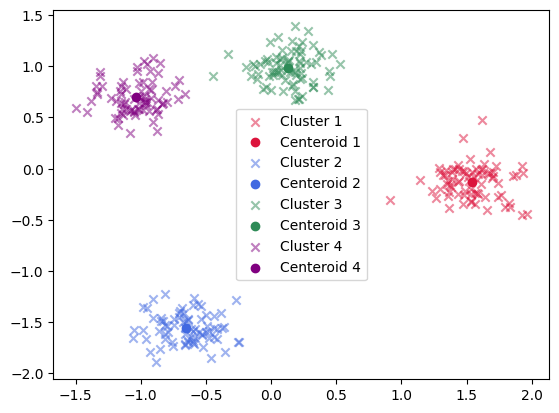

In [49]:
colors = ['crimson', 'royalblue', 'seagreen', 'purple', 'gold']

def plotClusters(clusters, centeroids):
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        plt.scatter(x, y, color = colors[i], label = f'Cluster {i + 1}', alpha = 0.5, marker = 'x')
        plt.scatter(centeroids[i][0], centeroids[i][1], color = colors[i], marker = 'o', label = f'Centeroid {i + 1}')
    plt.legend()
    plt.show()

plotClusters(clusters, centeroids)

In [50]:
def initialize_medoids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def compute_dissimilarities(data, medoids):
    return np.abs(data[:, np.newaxis] - medoids).sum(axis=2)

def assign_clusters(dissimilarities):
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    new_medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) == 0:
            continue
        medoid_idx = np.argmin(np.sum(np.abs(cluster_points[:, np.newaxis] - cluster_points), axis=2).sum(axis=1))
        new_medoids[i] = cluster_points[medoid_idx]
    return new_medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters


In [53]:
k = 4
centroids, clusters = k_medoids(scaledData, k)

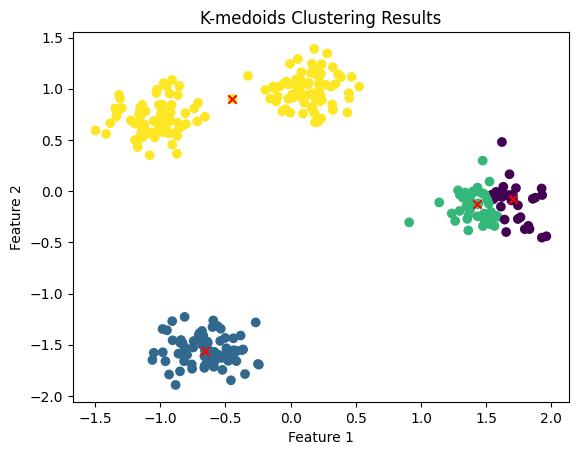

In [57]:
plt.scatter(scaledData[:, 0], scaledData[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()